In [1]:
from sklearn import cluster
from scipy.spatial import distance
import sklearn.datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
from alfabeto_data import dissertation_images as di

ready!


2 : -28651.5717125
3 : -26592.3607963
4 : -25274.6359679
5 : -24375.85518
6 : -24177.1613572
7 : -24026.9152756
8 : -23820.3934689
9 : -23674.556438
10 : -23548.6007269
11 : -23447.327118
12 : -23318.229343
13 : -23179.6968752
14 : -23100.3522204
15 : -23033.7876375
16 : -22990.5168718
17 : -22955.9829518
18 : -22942.2647745
19 : -22909.9609085
20 : -22892.8900726
21 : -22870.613712
22 : -22837.8943823
23 : -22832.8434194
24 : -22800.6419725
25 : -22785.2656379
26 : -22762.4042506
27 : -22729.5540257
28 : -22750.5928754
29 : -22768.8925167
30 : -22746.0978718
31 : -22675.2198418
32 : -22689.8806936
33 : -22723.9167274
34 : -22687.1587159
35 : -22679.4592353
36 : -22675.0726391
37 : -22665.636919
38 : -22655.977247
39 : -22660.4424041
40 : -22653.5706379
41 : -22647.1190693
42 : -22680.4934915
43 : -22663.5374606
44 : -22680.0003684
45 : -22682.999707
46 : -22699.4572496
47 : -22694.0104355


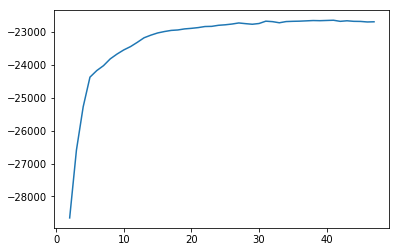

In [26]:
def compute_bic(kmeans,X):
    """
    Computes the BIC metric for a given clusters

    Parameters:
    -----------------------------------------
    kmeans:  List of clustering object from scikit learn

    X     :  multidimension np array of data points

    Returns:
    -----------------------------------------
    BIC value
    """
    # assign centers and labels
    centers = [kmeans.cluster_centers_]
    labels  = kmeans.labels_
    #number of clusters
    m = kmeans.n_clusters
    # size of the clusters
    n = np.bincount(labels)
    #size of data set
    N, d = X.shape

    #compute variance for all clusters beforehand
    cl_var = (1.0 / (N - m) / d) * sum([sum(distance.cdist(X[np.where(labels == i)], [centers[0][i]], 
             'euclidean')**2) for i in range(m)])

    const_term = 0.5 * m * np.log(N) * (d+1)

    BIC = np.sum([n[i] * np.log(n[i]) -
               n[i] * np.log(N) -
             ((n[i] * d) / 2) * np.log(2*np.pi*cl_var) -
             ((n[i] - 1) * d/ 2) for i in range(m)]) - const_term

    return(BIC)


corpus = di.palestrina_notes_data
# IRIS DATA
# iris = sklearn.datasets.load_iris()
X = np.array(corpus[0])  # extract only the features
# #Xs = StandardScaler().fit_transform(X)
# Y = iris.target

ks = range(2,48)

# run 9 times kmeans and save each result in the KMeans object
# KMeans = [cluster.KMeans(n_clusters = i, init="k-means++").fit(X) for i in ks]

KMeans1 = [di.k_means_simple(corpus[0], i, 
                            di.label_maker_alfabeto(corpus[1]))['kmeans'] for i in ks]

# now run for each cluster the BIC computation
BIC = [compute_bic(kmeansi,X) for kmeansi in KMeans1]

for x in range(len(BIC)):
    print(x+2, ':', BIC[x])
import matplotlib.pyplot as plt

plt.plot([x for x in range(2, 48)], BIC)


In [13]:
X

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [43]:
from sklearn.cluster import DBSCAN

def dbscan_simple(list_of_lists, cluster_number, label_markers):

    data = np.array(list_of_lists)
    label_dict = {}
    label_numbers = []
    n = 0
    label_dict[label_markers[0]] = 0
    for j in range(1, len(label_markers)):
        if label_markers[j] not in label_dict:
            label_dict[label_markers[j]] = n+1
            n += 1

    for i in label_markers:
        label_numbers.append(label_dict[i])
    n_samples, n_features = data.shape
    n_digits = cluster_number
    labels = np.array(label_numbers)
    
    # print('label numbers', label_numbers)
    # sample_size = 300

    sample_size = len(data)
    
    k_data = DBSCAN(eps=0.3, min_samples=3).fit(data)
    labels = k_data.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    print(n_clusters_)
#     silhouette = metrics.silhouette_score(data, k_data.labels_, metric='euclidean', sample_size=sample_size)
#     completeness = metrics.completeness_score(labels, k_data.labels_)
#     homogeneity = metrics.homogeneity_score(labels, k_data.labels_)
#    pca = PCA(n_components=2)
#    pca.fit_transform(data)
#    pca_data = KMeans(init='k-means++', n_clusters=n_digits, n_init=1000, precompute_distances=True, tol=0.00001, n_jobs=-1).fit(pca)
#     pca = PCA(n_components=2).fit(data).score(data)
#     return {'silhouette': silhouette, 'completeness': completeness, 'kmeans': k_data, 'homogeneity': homogeneity}
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

NameError: name 'labels' is not defined

In [42]:
dbscan_simple(di.bach_notes_data[0], 2, di.label_maker(di.bach_notes_data[1]))

0


In [2]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

In [12]:
X = np.array(di.alfabeto_notes_data[0])
label_dict = {}
label_numbers = []
n = 0
label_markers = di.label_maker_alfabeto(di.alfabeto_notes_data[1])
label_dict[label_markers[0]] = 0
for j in range(1, len(label_markers)):
    if label_markers[j] not in label_dict:
        label_dict[label_markers[j]] = n+1
        n += 1

for i in label_markers:
    label_numbers.append(label_dict[i])
n_samples, n_features = X.shape
# n_digits = cluster_number
labels = np.array(label_numbers)
print(labels)
# X = StandardScaler().fit_transform(X)

[ 0  1  1  2  3  0  1  2  2  1  4  5  5  1  0  0  6  6  6  1  4  1  0  0  4
  5  5  1  7  1  3  0  4  5  5  0  5  0  3  5  3  0  3  0  1  0  0  5  5  1
  1  1  1  3  3  3  3  5  5  1  1  1  6  3  6  5  1  5  1  5  5  5  1  1  1
  1  1  1  0  1  0  5  1  1  1  0  1  0  1  6  1  1  0  5  1  0  5  0  0  1
  2  5  0  1  5  2  1  1  0  5  1  4  5  1  1  5  2  5  1  0  4  5  0  5  5
  0  1  1  1  0  1  6  1  0  1  2  5  5  1  1  1  0  0  1  5  1  0  0  5  1
  0  5  5  0  8  2  1  0  6  1  1  3  5  3  9  1  0  0 10  5  5  2  4  5  0
  1  1  0  0  1  2  5  2  2  5  0  1  1  4  9  0  2  0  2  1  4 10  1  0  0
  0  1  3  0  0  1  1  1  5  2  9  1  5  1 10  5  1  3  5  4  1  5  1  4  1
  1  4  5  0  1  0  0  0  0  2  8  1  5  6  0  5  7  2  0  7  3  2  4  3  0
  0  0  4  7  0  6  0  1  1  0  0  0  6  0  0  1  6  6  0  5  0  0  0  0  0
  1  6  1  5  0  3  6  2  1  6  6  6  4  3  6  3  0  0  6  6  4  0  0  2  0
  2  0  0  6  6  6  2  4  5  6  1  6  6  0  2  2  2  2  2  0  0  4  1  4  5
  3  3  6  0

In [13]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

Estimated number of clusters: 0
Homogeneity: 0.000
Completeness: 1.000
V-measure: 0.000
Adjusted Rand Index: 0.000
Adjusted Mutual Information: 0.000


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [48]:
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

In [52]:
di.label_maker_alfabeto(di.alfabeto_notes_data[1])

['$♮:G$',
 '$♭:G$',
 '$♭:G$',
 '$♮:C$',
 '$♮:A$',
 '$♮:G$',
 '$♭:G$',
 '$♮:C$',
 '$♮:C$',
 '$♭:G$',
 '$♭:D$',
 '$♭:F$',
 '$♭:F$',
 '$♭:G$',
 '$♮:G$',
 '$♮:G$',
 '$♮:D$',
 '$♮:D$',
 '$♮:D$',
 '$♭:G$',
 '$♭:D$',
 '$♭:G$',
 '$♮:G$',
 '$♮:G$',
 '$♭:D$',
 '$♭:F$',
 '$♭:F$',
 '$♭:G$',
 '$♭:C$',
 '$♭:G$',
 '$♮:A$',
 '$♮:G$',
 '$♭:D$',
 '$♭:F$',
 '$♭:F$',
 '$♮:G$',
 '$♭:F$',
 '$♮:G$',
 '$♮:A$',
 '$♭:F$',
 '$♮:A$',
 '$♮:G$',
 '$♮:A$',
 '$♮:G$',
 '$♭:G$',
 '$♮:G$',
 '$♮:G$',
 '$♭:F$',
 '$♭:F$',
 '$♭:G$',
 '$♭:G$',
 '$♭:G$',
 '$♭:G$',
 '$♮:A$',
 '$♮:A$',
 '$♮:A$',
 '$♮:A$',
 '$♭:F$',
 '$♭:F$',
 '$♭:G$',
 '$♭:G$',
 '$♭:G$',
 '$♮:D$',
 '$♮:A$',
 '$♮:D$',
 '$♭:F$',
 '$♭:G$',
 '$♭:F$',
 '$♭:G$',
 '$♭:F$',
 '$♭:F$',
 '$♭:F$',
 '$♭:G$',
 '$♭:G$',
 '$♭:G$',
 '$♭:G$',
 '$♭:G$',
 '$♭:G$',
 '$♮:G$',
 '$♭:G$',
 '$♮:G$',
 '$♭:F$',
 '$♭:G$',
 '$♭:G$',
 '$♭:G$',
 '$♮:G$',
 '$♭:G$',
 '$♮:G$',
 '$♭:G$',
 '$♮:D$',
 '$♭:G$',
 '$♭:G$',
 '$♮:G$',
 '$♭:F$',
 '$♭:G$',
 '$♮:G$',
 '$♭:F$',
 '$♮:G$',
 '$♮:G$',
 '$♭:G$',


In [11]:
for x in X[0]:
    print(x)

-1.40638494073
2.10306562728
-0.43794312331
-0.961454625795
1.8827976123
-1.98462616506
-0.433762021255
1.59956654056
-0.460753206921
0.627723702014
-0.899784634512
1.32914692813
